Best k: 2
R² Score: 0.6851
MSE: 36551414.8145
MAE: 2825.2419


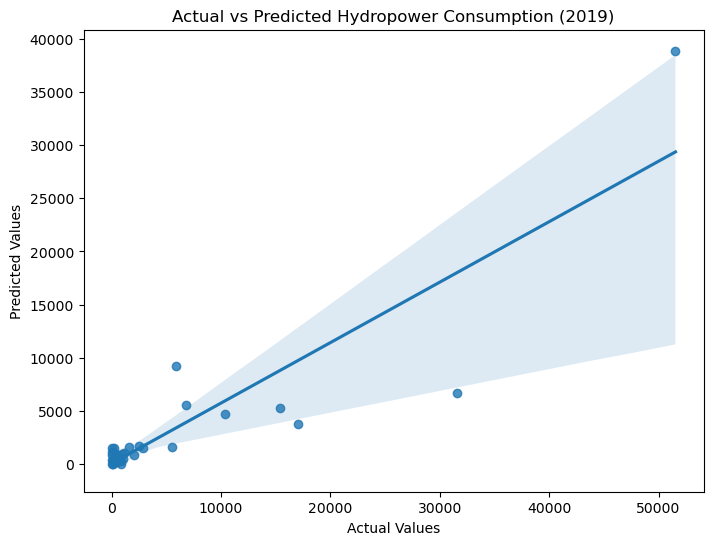

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load dataset
df = pd.read_csv("Practice dataset 1 KNN regression Hydropower_Consumption.csv")

# Encode categorical column (Country)
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

# Split features and target
X = df.drop(columns=['2019'])  # Using past years as features
y = df['2019']  # Predicting 2019 hydropower consumption

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for best k value
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

# Train final model
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Hydropower Consumption (2019)")
plt.show()